# Using neural networks on MNIST Data 

In [ ]:
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

## Reading the data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
y_train[0]

5

## Visualizing images from our data

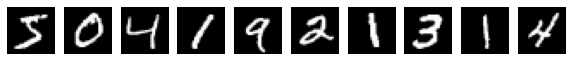

label for each of the above image: [5 0 4 1 9 2 1 3 1 4]


In [ ]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## Normalizing our train and test data

In [ ]:
# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# # normalize inputs from 0-255 to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

print('Training set', x_train.shape, y_train.shape)
print('Test set', x_test.shape, y_test.shape)

Training set (60000, 784) (60000,)
Test set (10000, 784) (10000,)


## OHE the target variables

In [ ]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test_cat=to_categorical(y_test,num_classes)

In [ ]:
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Definfing the sequential Model

In [ ]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

image_size=28*28

# create model
model = Sequential()  

model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used 
# model.add(Dense(num_classes, activation='softmax', kernel_initializer='he_uniform',input_shape=(image_size,))) ### For multiclass classification Softmax is used 

In [ ]:
# Compile model
#RMS_prop=optimizers.RMSprop()   ## we can similarly use different optimizers like RMSprop, Adagrad and SGD 
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [ ]:
## Looking into our base model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 223,978
Trainable params: 223,978
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [ ]:
# Fit the model
history=model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/10

Epoch 1: saving model to model_weights.h5
375/375 - 2s - loss: 0.3423 - accuracy: 0.8984 - val_loss: 0.1459 - val_accuracy: 0.9559 - lr: 0.0010 - 2s/epoch - 5ms/step
Epoch 2/10

Epoch 2: saving model to model_weights.h5
375/375 - 1s - loss: 0.1219 - accuracy: 0.9637 - val_loss: 0.1137 - val_accuracy: 0.9676 - lr: 0.0010 - 1s/epoch - 3ms/step
Epoch 3/10

Epoch 3: saving model to model_weights.h5
375/375 - 1s - loss: 0.0794 - accuracy: 0.9770 - val_loss: 0.0966 - val_accuracy: 0.9700 - lr: 0.0010 - 1s/epoch - 3ms/step
Epoch 4/10

Epoch 4: saving model to model_weights.h5
375/375 - 1s - loss: 0.0623 - accuracy: 0.9803 - val_loss: 0.0954 - val_accuracy: 0.9723 - lr: 0.0010 - 1s/epoch - 3ms/step
Epoch 5/10

Epoch 5: saving model to model_weights.h5
375/375 - 1s - loss: 0.0455 - accuracy: 0.9857 - val_loss: 0.0875 - val_accuracy: 0.9748 - lr: 0.0010 - 1s/epoch - 3ms/step
Epoch 6/10

Epoch 6: saving model to model_weights.h5
375/375 - 1s - loss: 0.0347 - accuracy: 0.9884 - val_los

In [ ]:
# predicting the model on test data
y_pred=model.predict(x_test)


In [ ]:
y_pred[0]

array([4.0648849e-09, 2.2037309e-08, 1.1385659e-06, 2.3441264e-06,
       1.1637825e-10, 9.4872166e-11, 4.6845621e-14, 9.9999475e-01,
       3.8714434e-10, 1.7416215e-06], dtype=float32)

In [ ]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [ ]:
y_pred_final[0]


7

## Generating classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Confusion Matrix

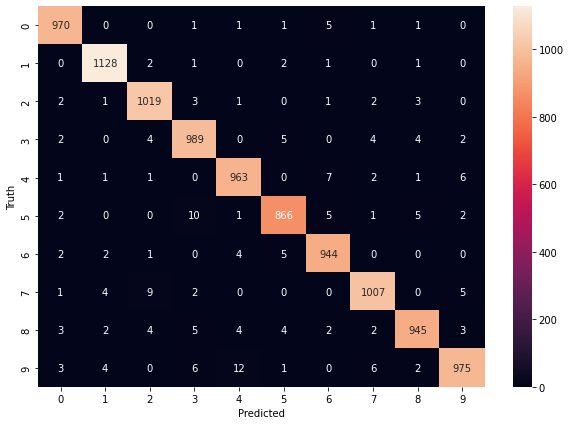

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Misclassified images

In [ ]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, y_pred_final):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[151, 247, 321, 340, 359, 381, 445, 495, 582, 619, 659, 684, 691, 707, 720, 844, 874, 900, 951, 956, 1003, 1014, 1039, 1112, 1156, 1182, 1192, 1226, 1228, 1232, 1242, 1247, 1299, 1319, 1328, 1393, 1395, 1522, 1527, 1530, 1549, 1553, 1670, 1681, 1717, 1790, 1800, 1901, 1911, 1941, 2004, 2024, 2033, 2053, 2070, 2093, 2098, 2109, 2118, 2135, 2174, 2224, 2272, 2293, 2369, 2387, 2406, 2414, 2488, 2512, 2597, 2607, 2648, 2654, 2720, 2743, 2760, 2877, 2921, 2939, 2953, 3060, 3073, 3117, 3422, 3490, 3503, 3520, 3534, 3549, 3558, 3567, 3727, 3751, 3776, 3780, 3808, 3818, 3838, 3853, 3869, 3893, 3902, 3926, 3941, 3943, 3985, 4027, 4065, 4078, 4123, 4140, 4199, 4224, 4248, 4271, 4294, 4433, 4497, 4500, 4536, 4548, 4601, 4639, 4731, 4740, 4807, 4814, 4823, 4879, 4880, 4956, 5409, 5634, 5642, 5676, 5734, 5757, 5887, 5936, 5937, 5955, 5973, 5997, 6011, 6023, 6045, 6046, 6059, 6166, 6173, 6400, 6421, 6505, 6555, 6560, 6571, 6574, 6597, 6625, 6641, 6651, 6706, 6755, 6783, 6847, 7216, 7434, 7451, 8094,

## Predicting the output

Was predicted  6
Was labeled  4
Predicted Probabilities:  [[3.7027272e-05 1.5746573e-05 1.5344693e-02 4.5653281e-04 1.8647643e-02
  1.9522757e-07 9.6547538e-01 2.1615682e-05 1.0979641e-06 1.2355794e-09]]


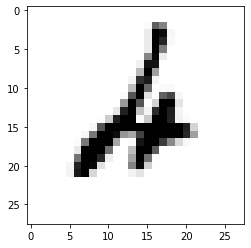

In [ ]:
image_index = 247
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(-1, 784))
print("Was predicted ",pred.argmax())
print("Was labeled ",y_test[image_index])
print("Predicted Probabilities: ",pred)

## Accuracy curve

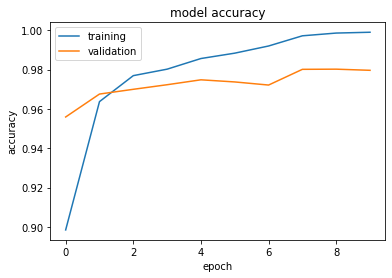

In [ ]:
loss, accuracy  = model.evaluate(x_test, y_test_cat, verbose=False)
    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

#### Happy Learning